# エイムズ市の住宅価格
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

[Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)



# Kaggleのカーネル
Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

《参考カーネル》

[Comprehensive data exploration with Python | Kaggle](hhttps://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonttps://)

（まずはここから）

 [House Prices : EDA to ML (Beginner) | Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)

[A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)



# データセットの準備
データセットはKaggleからダウンロードします。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


上記URLを開き、Dataのページへ移動してください。

![Image from Gyazo](https://t.gyazo.com/teams/diveintocode/110c4ffdae2dba11c843ea21e97ff903.png)


この中の`train.csv`を使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。



## 【問題1】データセットの取得
`pd.read_csv()`を使用して、変数に格納してください。



### 【問題1】解答

In [1]:
import pandas as pd

df = pd.read_csv('../house-prices-advanced-regression-techniques/train.csv')
df.shape

(1460, 81)

## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

### 【問題2】解答
米国アイオワ州のエイムズという都市の物件価格を予測する問題。
データは、”築年数”、”設備”、”広さ”、”エリア”、”ガレージに入る車の数”など79個の変数および物件価格による
1460戸の物件から構成されたデータセット。

# データの概観

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

* 各特徴量がどういったものかを見る。（数値データか文字データなど）
* 今回の目的変数はどの列か確認する。
* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### 【問題3】解答

1. 各特徴量がどういったものかを`df.head()`で見る。

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
print(df.shape)
display(df.head())

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. 今回の目的変数はどの列か

**Goal** : you must predict the value of the `SalePrice` variable. 

In [3]:
print(df.columns.get_loc('SalePrice'))

80


3. 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [4]:
display(df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

* 各特徴量の欠損値の有無を確認する。

欠損値の確認には`missingno`というライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

* 欠損値が何パーセント含まれるかを確認する。



（例）

<table>
  <thead>
    <tr>
      <th style="text-align: center">　</th>
      <th style="text-align: center">Total</th>
      <th style="text-align: center">missing_ratio</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center">PoolQC</td>
      <td style="text-align: center">1453</td>
      <td style="text-align: center">0.995205</td>
    </tr>
    <tr>
      <td style="text-align: center">MiscFeature</td>
      <td style="text-align: center">&nbsp;</td>
      <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
      <td style="text-align: center">Alley</td>
      <td style="text-align: center">&nbsp;</td>
      <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
      <td style="text-align: center">Fence</td>
      <td style="text-align: center">&nbsp;</td>
      <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
      <td style="text-align: center">：</td>
      <td style="text-align: center">：</td>
      <td style="text-align: center">&nbsp;</td>
    </tr>
  </tbody>
</table>

* 5つ以上欠損値がある特徴量（列）は削除する。
* 欠損値があるサンプル（行）は削除する。


### 【問題4】解答

In [5]:
print('各特徴量の欠損値の有無')
import missingno as msno

msno.matrix(df)

各特徴量の欠損値の有無


In [6]:
print('欠損値が何パーセント含まれるか')

missing_val_1 =  df.isnull().sum()
missing_val_2 =  round(df.isnull().sum()/df.shape[0]*100)

missing_val_list = pd.concat([missing_val_1, missing_val_2], axis=1)
missing_val_list.columns=['Total', 'missing_ratio']
missing_val_list

欠損値が何パーセント含まれるか


,Total,missing_ratio
Id,0,0.0
MSSubClass,0,0.0
MSZoning,0,0.0
LotFrontage,259,18.0
LotArea,0,0.0
Street,0,0.0
Alley,1369,94.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,0.0


In [7]:
df.shape

(1460, 81)

In [8]:
delete_list = missing_val_list.query('Total >= 5').index
# 5つ以上欠損値がある特徴量（列）は削除する。
df = df.drop(delete_list, axis=1)
df.shape

(1460, 63)

In [9]:
# 欠損値があるサンプル（行）は削除する。
df = df.dropna(how='any')
df.shape

(1459, 63)

# 目的変数
次は目的変数がどのような分布を持っているか確認していきます。



## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度


### 【問題5】解答

**歪度（わいど）**
* 分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズを$n$、各データ$x_{i}(i:1,2…,n)$の平均値$\overline{x}$を、標準偏差を$s$とすると歪度は次の式から求められます。


* 「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。

![](https://bellcurve.jp/statistics/wp-body/wp-content/ql-cache/quicklatex.com-ed33dd7b937bc96f531b8d882aa48844_l3.png)


**尖度（せんど）**
* 分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。サンプルサイズを$n$、各データ$x_{i}(i:1,2…,n)$の平均値$\overline{x}$を、標準偏差を$s$とすると尖度は次の式から求められます。


* 正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。

![](https://bellcurve.jp/statistics/wp-body/wp-content/ql-cache/quicklatex.com-16b97947df61268da80b850b096bb02b_l3.png)

## 【問題6】分布の確認
* seabornの`sns.distplot()`を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
* 目的変数に対して対数変換を行う。
* 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。



対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

[seaborn.distplot — seaborn 0.9.0 documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)



### 【問題6】解答

尖度: 6.502799105301849 歪度: 1.880007613681095


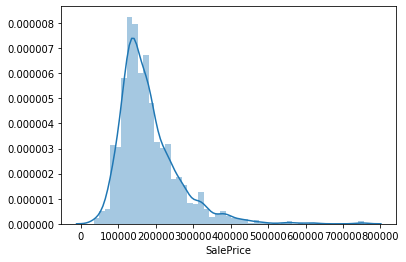

In [10]:
# seabornのsns.distplot()を使い目的変数の分布を表示
import seaborn as sns
sns.distplot(df.SalePrice)

import scipy

# 尖度
target_kurtosis = scipy.stats.kurtosis(df.SalePrice)

# 歪度
target_skew = scipy.stats.skew(df.SalePrice)

print('尖度:',target_kurtosis, '歪度:', target_skew )

In [11]:
import numpy as np
# 目的変数に対して対数変換を行う
target_log = df.SalePrice.apply(np.log)

尖度: 0.8000555650770789 歪度: 0.12119299622459463


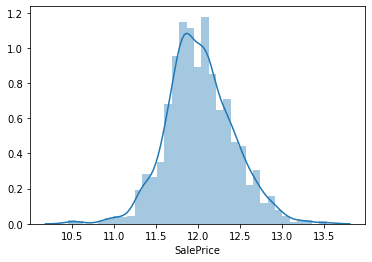

In [12]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する
sns.distplot(target_log)

# 尖度
target_log_kurtosis = scipy.stats.kurtosis(target_log)

# 歪度
target_log_skew = scipy.stats.skew(target_log)

print('尖度:',target_log_kurtosis, '歪度:', target_log_skew )

#### 対数変換の前後での変化について
対数変換することで、対数正規分布に従う変数の対数をとり，正規分布に従う変数を作ることができるようになった。

対数変換後、尖度、歪度共に0に近づいた。

## 7.特徴量

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

* 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
* 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
* 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
* 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


**《補足》**

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### 【問題7】解答

In [37]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける
import matplotlib.pyplot as plt
df = df.apply(np.log) # 対数変換
df_corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='Blues')

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


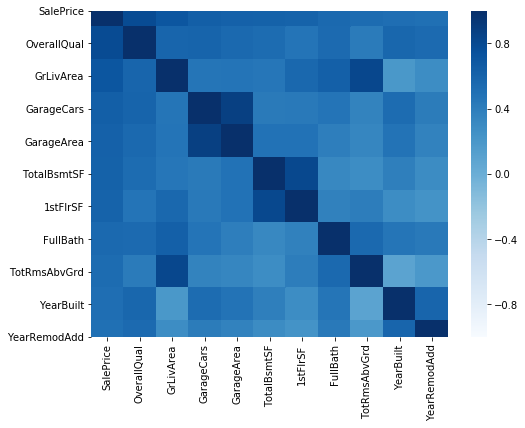

In [39]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る
target_corr = df_corr.SalePrice.sort_values(ascending=False) # 上位１０個取得　
top10_list = target_corr[0:11].index # 上位１０個の特徴量のインデックスのリスト作成
print(top10_list[1:])
top10_corr = df[top10_list].corr() # 上位１０個の特徴量だけで相関係数行列を作成
plt.figure(figsize=(8,6))
sns.heatmap(top10_corr, vmax=1, vmin=-1, center=0, cmap='Blues') # ヒートマップにプロット

#### 10個の特徴量について

* 'OverallQual'：家の全体的な素材と完成度を評価

* 'GrLivArea'：地上のリビングエリアの面積

* 'GarageCars'：ガレージにおける車の収容数

* 'GarageArea'：ガレージの面積

* 'TotalBsmtSF'：地下の合計面積

* '1stFlrSF'：１階の面積

* 'FullBath'：地上のバスルーム数

* 'TotRmsAbvGrd'：地上の部屋数

* 'YearBuilt'：建築日

* 'YearRemodAdd'：リフォーム日（ない場合は建築日と同じ）



＊アメリカの不動産情報では、家の面積が地上と地下に分けて表示される。


In [40]:
# * 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

top10_list_2 = top10_corr.iloc[:, 1:].corr()
top10_list_2

display(top10_list_2.mask(top10_list_2 == 1, 0))

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,0.000000,0.057996,0.275193,0.204615,0.067729,-0.092993,0.100045,-0.129441,0.332394,0.298261
GrLivArea,0.057996,0.000000,-0.212313,-0.173003,-0.038225,0.263952,0.419361,0.928627,-0.791400,-0.592605
GarageCars,0.275193,-0.212313,0.000000,0.949604,-0.067229,-0.133749,-0.168767,-0.285691,0.298506,0.007046
GarageArea,0.204615,-0.173003,0.949604,0.000000,0.103486,0.050249,-0.295613,-0.275872,0.182443,-0.117372
TotalBsmtSF,0.067729,-0.038225,-0.067229,0.103486,0.000000,0.886347,-0.507933,-0.237856,-0.153085,-0.389795
1stFlrSF,-0.092993,0.263952,-0.133749,0.050249,0.886347,0.000000,-0.357857,0.081699,-0.465429,-0.608038
FullBath,0.100045,0.419361,-0.168767,-0.295613,-0.507933,-0.357857,0.000000,0.431648,-0.091304,-0.021001
TotRmsAbvGrd,-0.129441,0.928627,-0.285691,-0.275872,-0.237856,0.081699,0.431648,0.000000,-0.810172,-0.585185
YearBuilt,0.332394,-0.791400,0.298506,0.182443,-0.153085,-0.465429,-0.091304,-0.810172,0.000000,0.644966
YearRemodAdd,0.298261,-0.592605,0.007046,-0.117372,-0.389795,-0.608038,-0.021001,-0.585185,0.644966,0.000000


GarageArea, GarageCars：0.949604

GrLivArea, TotRmsAbvGrd：0.928627

TotalBsmtSFと1stFlrSF：0.886347